In [39]:
# Data to use
# https://oceandata.sci.gsfc.nasa.gov/MODIS-Aqua/Mapped/Daily/4km/sst/
# https://oceandata.sci.gsfc.nasa.gov/MODIS-Aqua/Mapped/Daily/4km/chlor_a/

import urllib.request
import requests
import netCDF4
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import numpy as np
import glob
import pickle
from bs4 import BeautifulSoup
import webbrowser 

1

# OBTAIN A LIST OF LINKS TO THE YEARLY DATA FROM WEBSITE
#""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""# 
exit=False
print("Select a parameter; CHLA (chlorophyll a) or SST(surface temperature)\n")
while not exit:
    Userparameter = input() #---------------{IPUT PARAMETER, 'CHLA' for for chlorophyll a, 'SST' for surface temperature} 
    if Userparameter.upper()=='CHLA':
        link1= "https://oceandata.sci.gsfc.nasa.gov/MODIS-Aqua/Mapped/Daily/4km/chlor_a/"
        exit=True
    elif Userparameter.upper()=='SST':
        link1= "https://oceandata.sci.gsfc.nasa.gov/MODIS-Aqua/Mapped/Daily/4km/sst/"
        exit=True
    else:
        print("Give a valid inpout; CHLA (chlorophyll a) or SST(surface temperature)\n")
    
    

page=requests.get(link1)
soup = BeautifulSoup(page.text, 'html.parser')

listofitems1 = soup.find(class_='column').find_all('a')[7:]

Yearlinks=[]


for item in listofitems1:
    stringchars=[]
    second_symbol=False 
    first_symbol=False
    link = str(item)
    while not second_symbol:
        for letter in link:
            if (letter=='"') and not first_symbol:          
                first_symbol=True
            elif (letter=='"'):
                second_symbol=True
                break
            if (letter!= '"') and first_symbol:
                stringchars.append(letter)      
    s=''.join(stringchars)
    Yearlinks.append(s)


#""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""# 
    

# USER INPUT TO SELECT YEAR
#""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""# 
print("Input the year you would like to retrieve the data for. Year must be between 2002-2020.")
Useryear=input() #--------{SELECT YEAR} 
prefix='https://oceandata.sci.gsfc.nasa.gov'

for link in Yearlinks:
    Year=list(str(Useryear))
    for char in link:
        if char==Year[0]:         
            Year.pop(0)
        if len(Year)==0:
            yearfound=link
            break
    if len(Year)==0:
        break
yearfound=prefix+yearfound


#""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""# 
 


# OBTAIN A LIST OF LINKS TO THE DAILY DATA FROM WEBSITE AND DOWNLOAD REQUIRED DAILY DATA
#""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""# 

page=requests.get(yearfound)
soup = BeautifulSoup(page.text, 'html.parser')
listofitems2 = soup.find(class_='column').find_all('a')[8:]
Dailylinks=[]; Daydata=[]
for datalink in listofitems2:
     Dailylinks.append(str(datalink))


def daily_data_chla(Dailylinks):
        
    

    Userdate=input() #-------------{INPUT DAY BETWEEN "001" and "365"}

    c1=0;c2=0;selectionmade=False; Daydata=[]

    #Select singe day here or a range of days
    while not selectionmade:
        if len(Userdate)>3:       
            while c1!=3 or c2!=3:
                c1=0;c2=0; n1=[];n2=[]

                if len(Userdate)<4:#------{checks if user changed input within while}
                    break
                if ("-" in Userdate) and Userdate[len(Userdate)-1]!="-":
                    for index in range(0,Userdate.index("-")):
                        if str(Userdate[index]).isdigit():
                            c1+=1
                            n1.append(Userdate[index])
                    for index in range(Userdate.index("-")+1,len(Userdate)):
                        if str(Userdate[index]).isdigit():
                            c2+=1
                            n2.append(Userdate[index])
                    if (c1!=3) or (c2!=3):
                        print('Give a valid format range separated by "-" or select a single day:\n')
                        Userdate=input()
                    else:
                        n1=int(''.join(n1))
                        n2=int(''.join(n2))
                        selectionmade=True; c3=0 
                        for i in range(0,len(Dailylinks)):
                            if int(Dailylinks[c3][61:64])>=(n1) and int(Dailylinks[c3][61:64])<=(n2):
                                Daydata.append(Dailylinks[c3][9:91])  
                            c3+=1
                        print('Daily data found for the following dates:\n', Daydata)

                else:
                    print('Give a valid format range separated by "-" or select a single day:\n')
                Userdate=input()

        if len(Userdate)==3 and Userdate.isdigit():
            dayfound=False
            while not dayfound:
                c1=0
                if len(Userdate)>3:#-----{check if user changed input within while}
                    break
                for i in range(0,len(Dailylinks)):
                    if Dailylinks[c1][61:64]==Userdate:
                        dayfound=True
                        print(f"Recorded daily data found for the day {Userdate}")
                        break
                    c1+=1
                else:
                    print(f'''There are no data recorded for the given day {Userdate}. Select another day from "000"-"365"
        or give a valid range separated by "-": ''')
                    Userdate=input()
            else:
                Daydata.append(Dailylinks[c1][9:91])
                selectionmade=True

        if len(Userdate)==3 and (not Userdate.isdigit()):
            print('Give a valid format range separated by "-" or select a single day:\n')
            Userdate=input()

        if len(Userdate)<3 :
            selectionmade=False
            print('Give a valid format range separated by "-" or select a single day:\n')
            Userdate=input()
    return Daydata
        
    
    
# DOWNLOAD LINKS OF DAILY DATA FOUND
#""""""""""""""""""""""""""""""""""""""""""#
if Userparameter.upper()=="CHLA":
    print('''Input the day of the year you would like to retrieve the data for. 
        Day must be between '000'and'365'.
        For a range of dates input as '000-365".\n''')
    Daydata=daily_data_chla(Dailylinks)
elif Userparameter.upper()=="SST":
    print("Temperature data for the whole year will be downloaded.")

    

#"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""# 



Select a parameter; CHLA (chlorophyll a) or SST(surface temperature)



 SST


Input the year you would like to retrieve the data for. Year must be between 2002-2020.


 2004


Temperature data for the whole year will be downloaded.


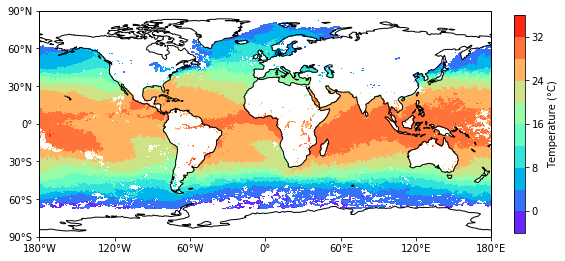

284.6799499988556


In [12]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np
import netCDF4
import time 

t0 = time.time()



file=r"/Users/constantinosconstantinou/Desktop/TERRA_MODIS.20190101_20190108.L3m.8D.NSST.sst.4km.nc"
d=netCDF4.Dataset(file)

lon=d.variables['lon'][:]
lat=d.variables['lat'][:]
temp=d.variables['sst'][:]
 

fig=plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree(0))
im=ax.contourf(lon,lat,temp,10,cmap='rainbow',transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()


ax.set_xticks([-180, -120, -60, 0, 60, 120, 180])
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90])
lon_formatter = LongitudeFormatter(dateline_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter) 
plt.colorbar(im, orientation='vertical', pad=0.04, shrink=0.8, label='Temperature (\xb0C)')
 
 
#""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
 
 



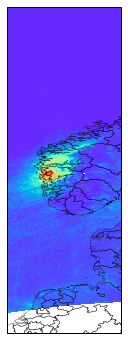

In [30]:
#                        2ND PICTURE (part of map e.g country)
#""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
from cartopy.feature import NaturalEarthFeature
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

file=r"C:\Users\con74781\Desktop\S5P_NRTI_L2__NO2____20200325T123850_20200325T124350_12685_01_010302_20200325T131953.nc"
d=netCDF4.Dataset(file)

lon=d["PRODUCT"].variables['longitude'][0,:]
lat=d["PRODUCT"].variables['latitude'][0,:]
NO2= d["PRODUCT"].variables['nitrogendioxide_tropospheric_column'][0,:]


fig2 = plt.figure(figsize=(7,6))
ax2 = plt.axes(projection=ccrs.PlateCarree())
x0=3; y0=50.8
x1=10; y1=70.8
ax2.set_extent([x0,x1,y0,y1], crs=ccrs.PlateCarree())

states = NaturalEarthFeature(category="cultural", scale="10m",facecolor="none",
                             name="admin_1_states_provinces_shp")
im2=ax2.contourf(lon,lat,NO2,60,cmap='rainbow')
ax2.add_feature(states, linewidth=0.3, edgecolor="black")
#ax2.coastlines('10m', linewidth=0.8)




plt.show(fig2)


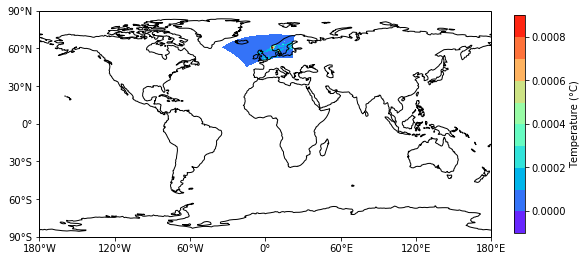

In [16]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np
import netCDF4





file=r"C:\Users\con74781\Desktop\S5P_NRTI_L2__NO2____20200325T123850_20200325T124350_12685_01_010302_20200325T131953.nc"
d=netCDF4.Dataset(file)

lon=d["PRODUCT"].variables['longitude'][0,:]
lat=d["PRODUCT"].variables['latitude'][0,:]
NO2= d["PRODUCT"].variables['nitrogendioxide_tropospheric_column'][0,:]


fig=plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree(0))
im=ax.contourf(lon,lat,NO2,10,cmap='rainbow',transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()


ax.set_xticks([-180, -120, -60, 0, 60, 120, 180])
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90])
lon_formatter = LongitudeFormatter(dateline_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter) 
plt.colorbar(im, orientation='vertical', pad=0.04, shrink=0.8, label='Temperature (\xb0C)')

In [5]:
d


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.7
    institution: KNMI
    source: Sentinel 5 precursor, TROPOMI, space-borne remote sensing, L2
    history: 2020-03-25 13:23:05 f_s5pops tropnll2dp /mnt/data1/storage_nrt/cache_nrt/WORKING-618725131/JobOrder.618723958.xml
    summary: TROPOMI/S5P NO2 1-Orbit L2 Swath 7x3.5km
    tracking_id: c11569d5-7b5a-4752-a827-d14e2bbb7c34
    id: S5P_NRTI_L2__NO2____20200325T123850_20200325T124350_12685_01_010302_20200325T131953
    time_reference: 2020-03-25T00:00:00Z
    time_reference_days_since_1950: 25651
    time_reference_julian_day: 2458933.5
    time_reference_seconds_since_1970: 1585094400
    time_coverage_start: 2020-03-25T12:38:45Z
    time_coverage_end: 2020-03-25T12:43:56Z
    time_coverage_duration: PT311.633S
    time_coverage_resolution: PT0.840S
    orbit: 12685
    references: http://www.tropomi.eu/data-products/nitrogen-dioxide
    processor_version: 1.3.2
    keywor

In [67]:
d["PRODUCT"].variables['delta_time'][0,:5]


masked_array(data=[45525170, 45526010, 45526850, 45527690, 45528530],
             mask=False,
       fill_value=999999)

C:\Users\con74781\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


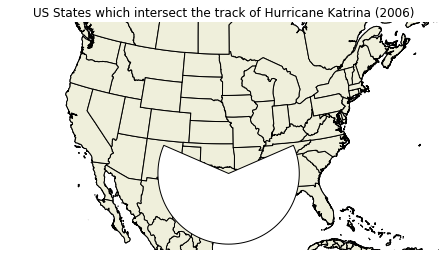

In [13]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader





def main():
    fig = plt.figure()
    
    ax=fig.add_subplot(2,1,1,projection=ccrs.LambertConformal())
    ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
    ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

    shapename = 'admin_1_states_provinces_lakes'
    states_shp = shpreader.natural_earth(resolution='10m',
                                         category='cultural', name=shapename)

    # to get the effect of having just the states without a map "background"
    # turn off the outline and background patches
    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)

    ax.set_title('US States which intersect the track of '
                 'Hurricane Katrina (2005)')

    def colorize_state(geometry):
        facecolor = (0.9375, 0.9375, 0.859375)
        
        return {'facecolor': facecolor, 'edgecolor': 'black'}

    ax.add_geometries(
        shpreader.Reader(states_shp).geometries(),
        ccrs.PlateCarree(), styler=colorize_state)

    
#======================================================================

    ax=fig.add_subplot(2,1,2,projection=ccrs.LambertConformal())
    ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
    ax.set_extent([-126, -66.5, 20, 50], ccrs.Geodetic())

    shapename = 'admin_1_states_provinces'
    states_shp = shpreader.natural_earth(resolution='10m',
                                         category='cultural', name=shapename)

    # to get the effect of having just the states without a map "background"
    # turn off the outline and background patches
    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)

    ax.set_title('US States which intersect the track of '
                 'Hurricane Katrina (2006)')

    

    ax.add_geometries(
        shpreader.Reader(states_shp).geometries(),
        ccrs.PlateCarree(), styler=colorize_state)

    
    
    
#================================================================================================    
    
    
   

    # make two proxy artists to add to a legend
#     direct_hit = mpatches.Rectangle((0, 0), 0.05, 0.05, facecolor="red")
#     within_2_deg = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF7E00")
#     labels = ['State directly intersects\nwith track',
#               'State is within \n2 degrees of track']
#     ax.legend([direct_hit, within_2_deg], labels,
#               loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True)

    plt.show()


if __name__ == '__main__':
    main()

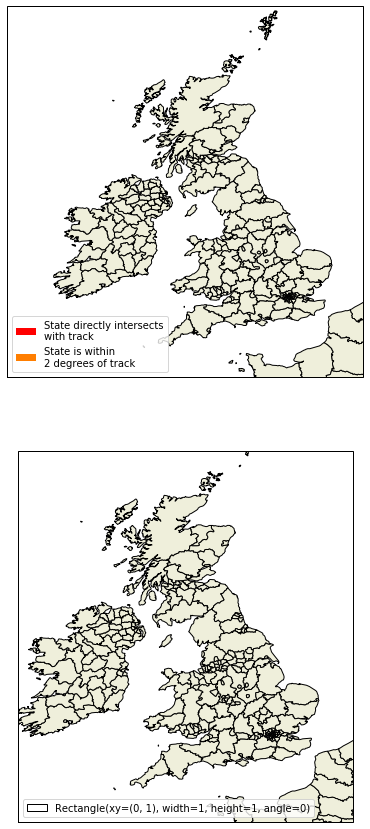

In [24]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


def colorize_state(geometry):
    facecolor = (0.9375, 0.9375, 0.859375)

    return {'facecolor': facecolor, 'edgecolor': 'black'}


#1ST figure on the right
#=========================
fig = plt.figure(figsize=(15,15))
ax=fig.add_subplot(2,1,1,projection=ccrs.Mollweide())
ax.set_extent([-12, 3, 49, 61], ccrs.Geodetic())
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp1 = shpreader.natural_earth(resolution='10m',category='cultural', name=shapename)
ax.add_geometries(shpreader.Reader(states_shp1).geometries(),ccrs.PlateCarree(), styler=colorize_state)


#Legend of 1st figure on the right
#==================================
direct_hit = mpatches.Rectangle((0, 0), 0.05, 0.05, facecolor="red")
within_2_deg = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF7E00")
labels = ['State directly intersects\nwith track','State is within \n2 degrees of track']
ax.legend([direct_hit, within_2_deg], labels,loc='lower left', bbox_to_anchor=(0,0), fancybox=True)


#2nd figure on the left
#==================================

ax=fig.add_subplot(2,1,2,projection=ccrs.Mollweide())
ax.set_extent([-10, 3, 49, 60], ccrs.Geodetic())
shapename = 'admin_1_states_provinces'
states_shp2 = shpreader.natural_earth(resolution='10m',category='cultural', name=shapename)
ax.add_geometries(shpreader.Reader(states_shp2).geometries(),ccrs.PlateCarree(), styler=colorize_state)



#Legend of 2nd figure on the right
#==================================
direct_hit = mpatches.Rectangle((0, 1), 1, 1, facecolor="red")
# within_2_deg = mpatches.Rectangle((0, 1), 0, 0, facecolor="#FF7E00")
# labels = ['State directly intersects with track','State is within 2 degrees of track']
# #ax.legend([direct_hit, within_2_deg], labels,loc='lower left', bbox_to_anchor=(0,0), fancybox=False)
ax.legend([direct_hit],loc='lower left')




plt.show()


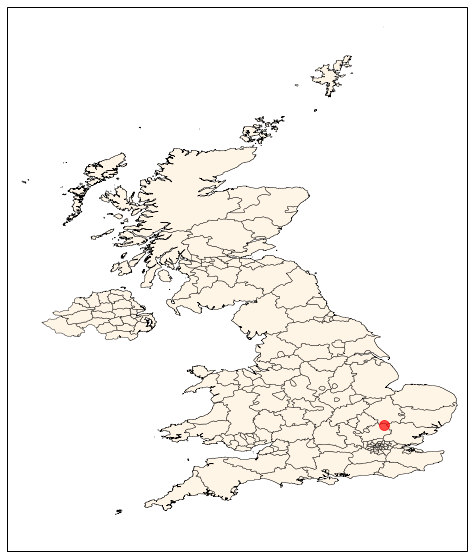

In [82]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
import cartopy.feature as cfeature


data=Reader(r"C:\Users\con74781\Desktop\Digital Projects\Python corona virus project\UK map with districts\GBR_adm2.shp")
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(projection=ccrs.PlateCarree())
ax.set_extent([-9, 2, 49, 62])
ax.add_geometries(data.geometries(), ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=(1,0.960784,0.901960))
ax.plot(0, 52, marker='o', color='red', markersize=10,
            alpha=0.7)


plt.show()




In [2]:
import shapely.geometry as sgeom
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
import cartopy.feature as cfeature
import matplotlib.colors as clrs
import datetime


#obtain list of geometries and boroughs from shapefile
geom=[]
district=[]
reader = Reader(r"C:\Users\con74781\Desktop\Digital Projects\Python corona virus project\UK map with districts\GBR_adm2.shp")
boroughs = reader.records()

for i in range(len(reader)):
    geom.append(next(boroughs).geometry)                 
        
boroughs = reader.records()
for i in range(len(reader)):
    district.append(next(boroughs).attributes["NAME_2"])
   




 # find from excel sheet and put GOV districts in list GOV_boroughs_list
import xlrd

District_filepath= r"C:\Users\con74781\Desktop\Digital Projects\Python corona virus project\UK regions from public health.xlsx"
wb=xlrd.open_workbook(District_filepath)
sheet=wb.sheet_by_index(0)

GOV_boroughs_list_EN=[]
GOV_boroughs=[]
temp_alpha_list=[]


#obtain list of boroughs in ENGLAND
for i in range(2,114): # column 4 in district sheet and start at row 2
    GOV_boroughs_str = sheet.cell_value(i,4) # column no.4
    for letter in GOV_boroughs_str:   
        if i in [8,11,41,49,78,89,92,93]:
            GOV_boroughs.append(GOV_boroughs_str)
            break  
        elif letter.isalpha() or letter=="." or letter==" " and len(temp_alpha_list)>1:
            temp_alpha_list.append(letter)
        elif letter==",":
            GOV_boroughs.append("".join(temp_alpha_list))
            temp_alpha_list=[]
    GOV_boroughs_list_EN.append(GOV_boroughs)
    GOV_boroughs=[]


GOV_boroughs_list_SC=[]
temp_alpha_list=[]  
#obtain list of boroughs in SCOTLAND
for i in range(162,176): # column 4 in district sheet and start at row 162
    GOV_boroughs_str = sheet.cell_value(i,4) # column no.4
    for letter in GOV_boroughs_str:   
        if letter.isalpha() or letter==" " and len(temp_alpha_list)>1:
            temp_alpha_list.append(letter)
        elif letter==",":
            GOV_boroughs.append("".join(temp_alpha_list))
            temp_alpha_list=[]
    GOV_boroughs_list_SC.append(GOV_boroughs)
    GOV_boroughs=[]    
    
    
    
    


#create dictionary to hold GOV_boroughs_list and total no. of cases in all boroughs for ENGLAND
#source of ENGLAND figures https://coronavirus.data.gov.uk/?_ga=2.158074239.492950272.1588090950-1306177147.1587672434
import csv
import math

csv_row=[]
with open(r'C:\Users\con74781\Downloads\coronavirus-cases_latest.csv','rt') as f:
    data = csv.reader(f)
    for row in data:
        csv_row.append(row)

total_infections=0
Dict_boroughs_EN = {}
borghs=0
allregions_inf=0

for sublist in GOV_boroughs_list_EN:
    for entry in sublist:        
        for i in range(len(csv_row)):
            if entry == csv_row[i][0]:
                total_infections+=int(csv_row[i][7])               
                break
    if borghs == 6:
        total_infections//=2
    elif borghs == 76:
        total_infections=math.ceil(total_infections/2)
    Dict_boroughs_EN["Boroughs_"+str(borghs)]= (GOV_boroughs_list_EN[borghs], "Total infections:",total_infections,"Shapefile name:" , district[borghs])
    borghs+=1
    allregions_inf+=total_infections
    total_infections=0


#create dictionary to hold GOV_boroughs_list and total no. of cases in all boroughs for SCOTLAND
# source of SCOTLAND figures   https://www.gov.scot/publications/trends-in-number-of-people-in-hospital-with-confirmed-or-suspected-covid-19/  
Dict_boroughs_SC = {}

Virus_cases_SC_file= r"C:\Users\con74781\Downloads\COVID-19+data+by+NHS+Board-300420-1.xlsx"
wb_SC=xlrd.open_workbook(Virus_cases_SC_file)
sheet_SC=wb_SC.sheet_by_index(2)


geom_SC=[]
geom_SC_temp=[]
for sublist in GOV_boroughs_list_SC:
    for entry in sublist:
        for i in range(140,172):
            if entry == sheet.cell_value(i,2):
                geom_SC_temp.append(geom[i-2])
                break
    geom_SC.append(geom_SC_temp) 
    geom_SC_temp=[]

borghs=0   
for i in range(162,176):
    for j in range (0,sheet_SC.ncols-1):
        if sheet.cell_value(i,3) == sheet_SC.cell_value(2,j):
            total_infections=int(sheet_SC.cell_value(sheet_SC.nrows-1,j))
            break   
    Dict_boroughs_SC["Boroughs_"+str(borghs)]= (GOV_boroughs_list_SC[borghs],"TOTAL INFECTIONS:",
                                                total_infections,"GOV_BOROUGHS_NAME:" ,sheet.cell_value(i,3),"geometries:", geom_SC[borghs] )
    borghs+=1
    

    
#create dictionary to hold GOV_boroughs_list and total no. of cases in all boroughs for NORTHERN IRELAND
# source of NI figures   "https://www.health-ni.gov.uk/" 

from bs4 import BeautifulSoup
import requests


total_infections=3767  #manually inputed until official data are released for download
Dict_boroughs_NI={}
GOV_boroughs_list_NI=[]
geom_NI=[]
for i in range(114,140):
    GOV_boroughs_list_NI.append(sheet.cell_value(i,2))
    geom_NI.append(geom[i-2])
Dict_boroughs_NI["Boroughs"]=(GOV_boroughs_list_NI, "Total Infections:", total_infections, "geometries:", geom_NI)

    
#create dictionary to hold GOV_boroughs_list and total no. of cases in all boroughs for WALES
# source of WALES figures   https://public.tableau.com/profile/public.health.wales.health.protection#!/vizhome/RapidCOVID-19virology-Public/Headlinesummary

Wales_data_path= r"C:\Users\con74781\Downloads\Rapid COVID-19 surveillance data.xlsx"
wb_WA=xlrd.open_workbook(Wales_data_path)
sheet_WA=wb_WA.sheet_by_index(1)


GOV_boroughs_list_WA=[]
Dict_boroughs_WA={}


for i in range (172,194):
    GOV_boroughs_list_WA.append(sheet.cell_value(i,6))

borghs=0
for entry in GOV_boroughs_list_WA:
    for j in range(0,sheet_WA.nrows-1):
        if entry == sheet_WA.cell_value(j,0):
            total_infections= int(sheet_WA.cell_value(j,3))
            break
    Dict_boroughs_WA["Boroughs_"+str(borghs)]=(GOV_boroughs_list_WA[borghs], "Total infections:", total_infections, "geomtries:", geom[borghs+170])
    borghs+=1
    

    
# find the highest figure of infection in the Dictionary boroughs.
# This to be used to set the map colour range (e.g 40%,30%,20%,10%) 
highest_inf=Dict_boroughs_EN["Boroughs_0"][2]
cntr=0

for entry in Dict_boroughs_EN:
    if Dict_boroughs_EN["Boroughs_"+str(cntr)][2] > highest_inf:
        highest_inf = Dict_boroughs_EN["Boroughs_"+str(cntr)][2]
        highest_inf_borough=Dict_boroughs_EN["Boroughs_"+str(cntr)][4]
    cntr+=1
    
cntr=0
for entry in Dict_boroughs_SC:
    if Dict_boroughs_SC["Boroughs_"+str(cntr)][2] > highest_inf:
        highest_inf = Dict_boroughs_SC["Boroughs_"+str(cntr)][2]
        highest_inf_borough=Dict_boroughs_SC["Boroughs_"+str(cntr)][4]
    cntr+=1

    
if Dict_boroughs_NI["Boroughs"][2] > highest_inf:
    highest_inf=Dict_boroughs_NI["Boroughs"][2]
    highest_inf_borough='Northern Ireland all districts '
    
cntr=0    
for entry in Dict_boroughs_WA:
    if Dict_boroughs_WA["Boroughs_"+str(cntr)][2] > highest_inf:
        highest_inf = Dict_boroughs_WA["Boroughs_"+str(cntr)][0]
        
    cntr+=1



    
# eppend gometries from SCOTLAND, ENGLAND, NORTHERN IRELAND, WALES in the colouring lists
col1=[];col2=[];col3=[];col4=[];
col1_n_dist=0; col2_n_dist=0; col3_n_dist=0; col4_n_dist=0;

for i in range(len(Dict_boroughs_EN)):
    if Dict_boroughs_EN["Boroughs_"+str(i)][2] > (0.6*highest_inf):
        col1.append(geom[i])
        col1_n_dist+=1
    elif (0.6*highest_inf) >= Dict_boroughs_EN["Boroughs_"+str(i)][2] > (0.35*highest_inf):
        col2.append(geom[i])
        col2_n_dist+=1
    elif (0.35*highest_inf) >= Dict_boroughs_EN["Boroughs_"+str(i)][2] > (0.15*highest_inf):
        col3.append(geom[i])
        col3_n_dist+=1
    else:
        col4.append(geom[i])
        col4_n_dist+=1
        
        
        
for i in range(len(Dict_boroughs_SC)):
    if Dict_boroughs_SC["Boroughs_"+str(i)][2] > (0.6*highest_inf):
        for entry in Dict_boroughs_SC["Boroughs_"+str(i)][6]:
            col1.append(entry)
            col1_n_dist+=1
    elif (0.6*highest_inf) >= Dict_boroughs_SC["Boroughs_"+str(i)][2] > (0.35*highest_inf):
        for entry in Dict_boroughs_SC["Boroughs_"+str(i)][6]:
            col2.append(entry)
            col2_n_dist+=1
    elif (0.35*highest_inf) >= Dict_boroughs_SC["Boroughs_"+str(i)][2] > (0.15*highest_inf):
        for entry in Dict_boroughs_SC["Boroughs_"+str(i)][6]:
            col3.append(entry)
            col3_n_dist+=1
    else:
        for entry in Dict_boroughs_SC["Boroughs_"+str(i)][6]:
            col4.append(entry)
            col4_n_dist+=1
            
if Dict_boroughs_NI["Boroughs"][2]>(0.6*highest_inf):
    for entry in Dict_boroughs_NI["Boroughs"][4]:
        col1.append(entry)
        col1_n_dist+=1
elif (0.6*highest_inf)>= Dict_boroughs_NI["Boroughs"][2] > (0.35*highest_inf):
    for entry in Dict_boroughs_NI["Boroughs"][4]:
        col2.append(entry)
        col2_n_dist+=1
elif (0.35*highest_inf)>= Dict_boroughs_NI["Boroughs"][2] > (0.15*highest_inf):
    for entry in Dict_boroughs_NI["Boroughs"][4]:
        col3.append(entry)
        col3_n_dist+=1
else:
    for entry in Dict_boroughs_NI["Boroughs"][4]:
        col4.append(entry)
        col4_n_dist+=1
        
for i in range(len(Dict_boroughs_WA)):
    if Dict_boroughs_WA["Boroughs_"+str(i)][2] > (0.6*highest_inf):
        col1.append(Dict_boroughs_WA["Boroughs_"+str(i)][4])
        col1_n_dist+=1
    elif (0.6*highest_inf) >= Dict_boroughs_WA["Boroughs_"+str(i)][2] > (0.35*highest_inf):
        col2.append(Dict_boroughs_WA["Boroughs_"+str(i)][4])
        col2_n_dist+=1
    elif (0.35*highest_inf) >= Dict_boroughs_WA["Boroughs_"+str(i)][2] > (0.15*highest_inf):
        col3.append(Dict_boroughs_WA["Boroughs_"+str(i)][4])
        col3_n_dist+=1
    else:
        col4.append(Dict_boroughs_WA["Boroughs_"+str(i)][4])
        col4_n_dist+=1
    

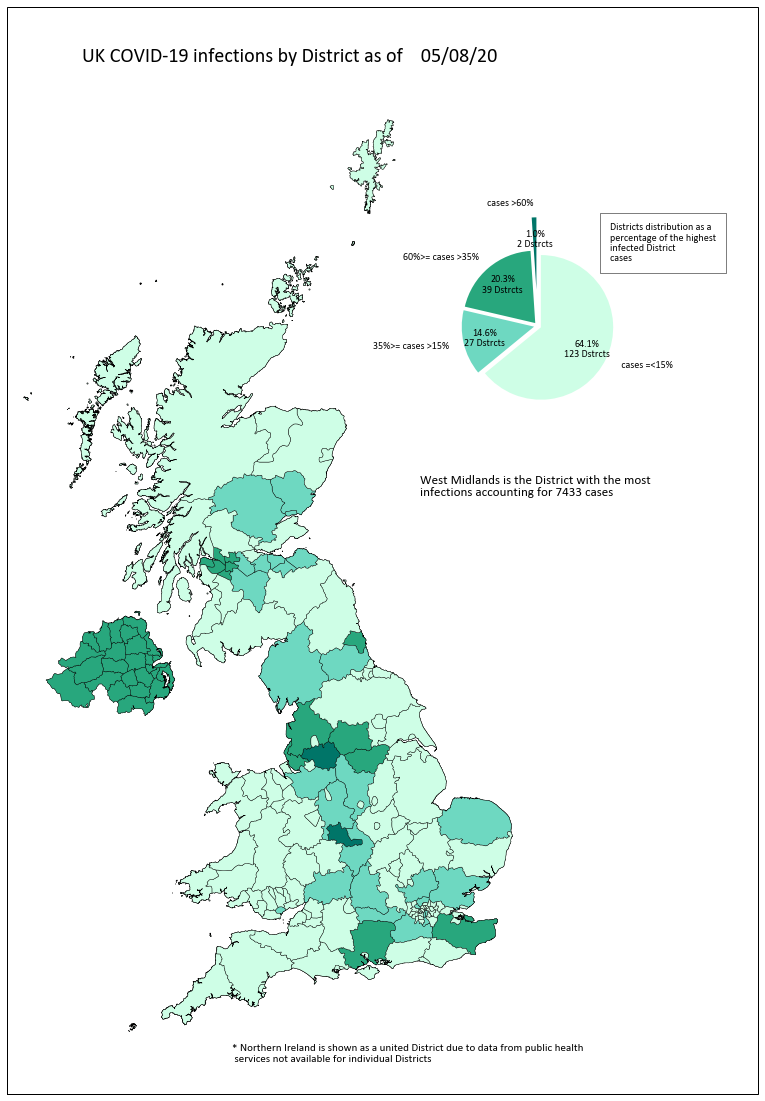

In [10]:
#plot the map of COVID-19 infection cases
fig = plt.figure(figsize=(20,20))
ax=plt.axes(projection=ccrs.Mercator())
ax.set_extent([-9, 7, 49, 62])

ax.add_geometries(reader.geometries() ,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=(1,0.960784,0.901960))
ax.add_geometries(col1,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=(0.0004,0.458823,0.407843))
ax.add_geometries(col2,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=(0.156862,0.654901,0.490196)) 
ax.add_geometries(col3,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=(0.431372,0.847058,0.756862)) 
ax.add_geometries(col4,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=(0.807843,0.996078,0.901960)) 
date_now = (datetime.datetime.now()).strftime("%x")
plt.text(0.1, 0.95, 'UK COVID-19 infections by District as of    {0}'.format(date_now),fontname='Calibri',
         fontsize=20,transform=ax.transAxes)
plt.text(0.3, 0.03, """* Northern Ireland is shown as a united District due to data from public health\n services not available for individual Districts""" ,
         fontname='Calibri',fontsize=11, transform=ax.transAxes)
plt.text(0.55,0.55,"{0} is the District with the most\ninfections accounting for {1} cases".format(highest_inf_borough,highest_inf),
         fontname='Calibri',fontsize=13, transform=ax.transAxes )
date_now = (datetime.datetime.now()).strftime("%x")




#Create legend

ax1 = plt.axes([0.55, 0.6, 0.14, 0.14])
labels = ['cases >60%', '60%>= cases >35%','35%>= cases >15%',' cases =<15%']
n_dist_list=[col1_n_dist,col2_n_dist,col3_n_dist,col4_n_dist]
explode = (0.5, 0.05, 0.05, 0.05) 
colors=((0.0004,0.458823,0.407843),(0.156862,0.654901,0.490196),(0.431372,0.847058,0.756862),(0.807843,0.996078,0.901960)) 
colors=clrs.to_rgba_array(colors)

def make_autopct(n_dist_list):
    def my_autopct(pct):        
        
        val = int((pct*192/100))
        return '{0:1.1f}%\n{1:d} Dstrcts'.format(pct,val)
    return my_autopct

ax1.pie(n_dist_list, explode=explode,colors=colors,pctdistance=0.7,labels=labels,autopct=make_autopct(n_dist_list),
        radius=1,startangle=90, textprops=dict(fontname='Calibri',fontsize=10,color="black"),labeldistance=1.2)

ax1.axis('equal') 
ax1.text(1,0.9, 'Districts distribution as a\npercentage of the highest\ninfected District\ncases ', fontname='Calibri',
         color='black',bbox=dict(facecolor='none',linewidth= '0.5', edgecolor='black', boxstyle='square,pad=1'))



plt.savefig(fname=r"C:\Users\con74781\Desktop\Digital Projects\Python corona virus project\UK_map_infections", dpi=200)
plt.show()
  
    

In [13]:
#Create Dictionaries for population density SCOTLAND 
# source       https://www.nrscotland.gov.uk/statistics-and-data/statistics/statistics-by-theme/population/population-estimates/mid-year-population-estimates/mid-2019

SC_density_data_path= r"C:\Users\con74781\Downloads\mid-year-pop-est-19-data.xlsx"
wb_SC_den=xlrd.open_workbook(SC_density_data_path)
sheet_SC_den=wb_SC_den.sheet_by_index(9)


Dict_SC_density={}

cntr=0
for i in range (41,55):
    Dict_SC_density["County_Density_"+str(cntr)]=(GOV_boroughs_list_SC[cntr], "GOV_BOROUGHS_NAME:", Dict_boroughs_SC["Boroughs_"+str(cntr)][4],
                                                  "Population_Density:", round(sheet_SC_den.cell_value(i,4)),
                                                 "geometries:",Dict_boroughs_SC["Boroughs_"+str(cntr)][6])
    cntr+=1

    
    
# Create Dictionaries for population density WALES
# source   https://statswales.gov.wales/Catalogue/Population-and-Migration/Population/Density/populationdensity-by-localauthority-year
link_WA_Density = r"https://statswales.gov.wales/Catalogue/Population-and-Migration/Population/Density/populationdensity-by-localauthority-year"

page=requests.get(link_WA_Density)
soup = BeautifulSoup(page.text, 'html.parser')
contents_den = soup.find(class_='dxpgControl').find_all(class_="dxpgCell")[10:]
contents_dis = soup.find(class_='dxpgMainTable').find_all('td', class_='dxpgRowFieldValue')[2:]


WA_densities=[]
numbers=[]
for i in range(10,len(contents_den)+1,10):
    entry=str(contents_den[i-1])
    for char in entry:
        if char in '0123456789.':
            numbers.append(char)
    WA_densities.append("".join(numbers[1:]))
    numbers=[]
    
WA_densities=[round(float(x)) for x in WA_densities]

WA_districts_online=[]
WA_districts_online = [str(x) for x in contents_dis]  
WA_districts_online = [x[63:-12] for x in WA_districts_online]  
WA_districts_online[8:] = [ x[1:] for x in WA_districts_online[8:]]  

Dict_WA_density={}
cntr=0
cn=0
for i in range(0,len(Dict_boroughs_WA)):
    for x in range(0,len(WA_districts_online)): 
        if WA_districts_online[cntr] == Dict_boroughs_WA["Boroughs_"+str(cn)][0]:
            Dict_WA_density["County_Density_"+str(cn)]=(WA_districts_online[cntr],"Population_Density:",
                                                        round(WA_densities[cntr]),"geometries:",Dict_boroughs_WA["Boroughs_"+str(cn)][4])
            cntr=0                                           
            break
        else: 
            cntr+=1 
    cn+=1


    
# Create Dictionaries for population density NORTHERN IRELAND
# source https://www.nisra.gov.uk/publications/2018-mid-year-population-estimates-northern-ireland#skip-link
NI_density_data_path= r"C:\Users\con74781\Downloads\MYE18_POP_DENSITIES.xlsx"
wb_NI_den=xlrd.open_workbook(NI_density_data_path)
sheet_NI_den=wb_NI_den.sheet_by_index(1)
Dict_NI_density={}

cn=0
for i in range(0,26):
    for row in range(0,sheet_NI_den.nrows):
        if sheet_NI_den.cell_value(row,0)[:1] == '5' and sheet_NI_den.cell_value(row,2)== Dict_boroughs_NI["Boroughs"][0][cn] and sheet_NI_den.cell_value(row,3) == 2018:
            Dict_NI_density["County_Density_"+str(cn)]=(Dict_boroughs_NI["Boroughs"][0][cn], "Population_Density:",
                                                       round(sheet_NI_den.cell_value(row,4)), "geometries:",Dict_boroughs_NI["Boroughs"][4][cn])
            cn+=1    
            break


# Create Dictionaries for population density ENGLAND
# source https://www.ons.gov.uk/
EN_density_data_path= r"C:\Users\con74781\Desktop\Digital Projects\Python corona virus project\Population density England.xlsx"
wb_EN_den=xlrd.open_workbook(EN_density_data_path)
sheet_EN_den=wb_EN_den.sheet_by_index(0)
Dict_EN_density={}


temp_borghs=[]
cn=0

for i in range(1,113):
    x=sheet_EN_den.cell_value(i,4)
    if isinstance(x,str):
        xsplit=x.split(",")
        for entry in xsplit:
            temp_borghs.append(sheet_EN_den.cell_value(int(entry)-1,2))
        Dict_EN_density["County_Density_"+str(cn)]= (sheet_EN_den.cell_value(i,1), "GOV_names:", temp_borghs, 
                                                         "Population Density:",int(sheet_EN_den.cell_value(i,5)), "geometries:", geom[i-1])
        temp_borghs=[]
    else:
        Dict_EN_density["County_Density_"+str(cn)]= (sheet_EN_den.cell_value(i,1),
                                                     "Population Density:",int(sheet_EN_den.cell_value(i,5)), "geometries:", geom[i-1])
    cn+=1         
            
            
        

In [14]:


#Create colouring columns
col11=[]; col12=[]; col13=[]; col14=[]; col15=[];col16=[]; col17=[]; 


#create colouring columns for SCOTLAND
cn=0
for i in range(0,len(Dict_SC_density)):
    if  Dict_SC_density["County_Density_"+str(cn)][4] < 50:
        for entry in Dict_SC_density["County_Density_"+str(cn)][6]:
            col11.append(entry)
    elif 150 > Dict_SC_density["County_Density_"+str(cn)][4] >= 50:
        for entry in Dict_SC_density["County_Density_"+str(cn)][6]: 
            col12.append(entry)
    elif 350 > Dict_SC_density["County_Density_"+str(cn)][4] >= 150:
        for entry in Dict_SC_density["County_Density_"+str(cn)][6]: 
            col13.append(entry)
    elif 750 > Dict_SC_density["County_Density_"+str(cn)][4] >= 350:
        for entry in Dict_SC_density["County_Density_"+str(cn)][6]: 
            col14.append(entry)
    elif 1550 > Dict_SC_density["County_Density_"+str(cn)][4] >= 750:
        for entry in Dict_SC_density["County_Density_"+str(cn)][6]: 
            col15.append(entry)
    elif 3150 > Dict_SC_density["County_Density_"+str(cn)][4] >= 1550:
        for entry in Dict_SC_density["County_Density_"+str(cn)][6]: 
            col16.append(entry)
    else:
        for entry in Dict_SC_density["County_Density_"+str(cn)][6]: 
            col17.append(entry)
    cn+=1

    
    
    
#create colouring columns for WALES
cn=0
for i in range(0,len(Dict_WA_density)):
    if  Dict_WA_density["County_Density_"+str(cn)][2] < 50:
            col11.append(Dict_WA_density["County_Density_"+str(cn)][4])
    elif 150 > Dict_WA_density["County_Density_"+str(cn)][2] >= 50:
            col12.append(Dict_WA_density["County_Density_"+str(cn)][4])
    elif 350 > Dict_WA_density["County_Density_"+str(cn)][2] >= 150:
            col13.append(Dict_WA_density["County_Density_"+str(cn)][4])
    elif 750 > Dict_WA_density["County_Density_"+str(cn)][2] >= 350:
            col14.append(Dict_WA_density["County_Density_"+str(cn)][4])
    elif 1550 > Dict_WA_density["County_Density_"+str(cn)][2] >= 750:
            col15.append(Dict_WA_density["County_Density_"+str(cn)][4])
    elif 3150 > Dict_WA_density["County_Density_"+str(cn)][2] >= 1550:
            col16.append(Dict_WA_density["County_Density_"+str(cn)][4])
    else:
            col17.append(Dict_WA_density["County_Density_"+str(cn)][4])
    cn+=1
    
#create colouring columns for NORTHERN IRELAND
cn=0
for i in range(0,len(Dict_NI_density)):
    if  Dict_NI_density["County_Density_"+str(cn)][2] < 50:
            col11.append(Dict_NI_density["County_Density_"+str(cn)][4])
    elif 150 > Dict_NI_density["County_Density_"+str(cn)][2] >= 50:
            col12.append(Dict_NI_density["County_Density_"+str(cn)][4])
    elif 350 > Dict_NI_density["County_Density_"+str(cn)][2] >= 150:
            col13.append(Dict_NI_density["County_Density_"+str(cn)][4])
    elif 750 > Dict_NI_density["County_Density_"+str(cn)][2] >= 350:
            col14.append(Dict_NI_density["County_Density_"+str(cn)][4])
    elif 1550 > Dict_NI_density["County_Density_"+str(cn)][2] >= 750:
            col15.append(Dict_NI_density["County_Density_"+str(cn)][4])
    elif 3150 > Dict_NI_density["County_Density_"+str(cn)][2] >= 1550:
            col16.append(Dict_NI_density["County_Density_"+str(cn)][4])
    else:
            col17.append(Dict_NI_density["County_Density_"+str(cn)][4])
    cn+=1
    
    
#create colouring columns for ENGLAND
cn=0
for i in range(0,len(Dict_EN_density)):
    
    if isinstance(Dict_EN_density["County_Density_"+str(cn)][2], int):
        if (Dict_EN_density["County_Density_"+str(cn)][2] < 50):
            col11.append(Dict_EN_density["County_Density_"+str(cn)][4])
    elif Dict_EN_density["County_Density_"+str(cn)][4] < 50:
            col11.append(Dict_EN_density["County_Density_"+str(cn)][6])
    
    if isinstance(Dict_EN_density["County_Density_"+str(cn)][2], int):
        if (150 > Dict_EN_density["County_Density_"+str(cn)][2] >= 50):
            col12.append(Dict_EN_density["County_Density_"+str(cn)][4])
    elif (150 > Dict_EN_density["County_Density_"+str(cn)][4] >= 50):
            col12.append(Dict_EN_density["County_Density_"+str(cn)][6])
            
    if isinstance(Dict_EN_density["County_Density_"+str(cn)][2], int): 
        if (350 > Dict_EN_density["County_Density_"+str(cn)][2] >= 150):
            col13.append(Dict_EN_density["County_Density_"+str(cn)][4])
    elif (350 > Dict_EN_density["County_Density_"+str(cn)][4] >= 150):
            col13.append(Dict_EN_density["County_Density_"+str(cn)][6])
    
    if isinstance(Dict_EN_density["County_Density_"+str(cn)][2], int): 
        if (750 > Dict_EN_density["County_Density_"+str(cn)][2] >= 350):
            col14.append(Dict_EN_density["County_Density_"+str(cn)][4])
    elif (750 > Dict_EN_density["County_Density_"+str(cn)][4] >= 350):
            col14.append(Dict_EN_density["County_Density_"+str(cn)][6])
            
    if isinstance(Dict_EN_density["County_Density_"+str(cn)][2], int):
        if (1550 > Dict_EN_density["County_Density_"+str(cn)][2] >= 750):
            col15.append(Dict_EN_density["County_Density_"+str(cn)][4])
    elif (1550 > Dict_EN_density["County_Density_"+str(cn)][4] >= 750):
            col15.append(Dict_EN_density["County_Density_"+str(cn)][6])
            
    if isinstance(Dict_EN_density["County_Density_"+str(cn)][2], int):
        if (3150 > Dict_EN_density["County_Density_"+str(cn)][2] >= 1550):
            col16.append(Dict_EN_density["County_Density_"+str(cn)][4])
    elif (3150 > Dict_EN_density["County_Density_"+str(cn)][4] >= 3150):
            col16.append(Dict_EN_density["County_Density_"+str(cn)][6])
    
    if isinstance(Dict_EN_density["County_Density_"+str(cn)][2], int):
        if (3150 <= Dict_EN_density["County_Density_"+str(cn)][2]):
            col17.append(Dict_EN_density["County_Density_"+str(cn)][4])
    elif (3150 <= Dict_EN_density["County_Density_"+str(cn)][4]):
            col17.append(Dict_EN_density["County_Density_"+str(cn)][6])
    
    cn+=1
            
            

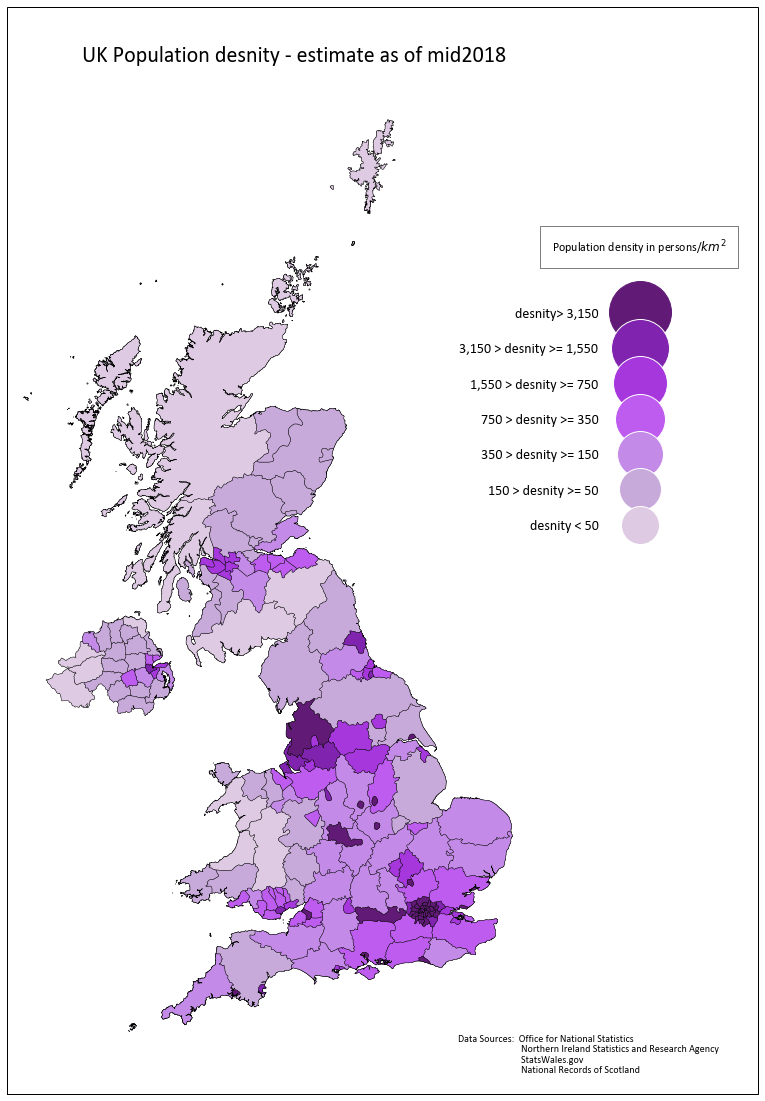

In [272]:
#plot the map of UK population density
fig = plt.figure(figsize=(20,20))
ax=plt.axes(projection=ccrs.Mercator())
ax.set_extent([-9, 7, 49, 62])

facecolor11=(0.870588,0.796078,0.890196)
facecolor12=(0.7803921,0.666666,0.854901)
facecolor13=(0.764705,0.545098,0.905882)
facecolor14=(0.741176,0.360784,0.933333)
facecolor15=(0.650980,0.215686,0.866666)
facecolor16=(0.501960,0.137254,0.686274)
facecolor17=(0.380392,0.105882,0.466666)


ax.add_geometries(reader.geometries() ,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=(1,1,1))
ax.add_geometries(col11,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=facecolor11)
ax.add_geometries(col12,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=facecolor12) 
ax.add_geometries(col13,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=facecolor13) 
ax.add_geometries(col14,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=facecolor14) 
ax.add_geometries(col15,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=facecolor15) 
ax.add_geometries(col16,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=facecolor16) 
ax.add_geometries(col17,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=facecolor17) 

plt.text(0.1, 0.95, 'UK Population desnity - estimate as of mid2018',fontname='Calibri', fontsize=22,transform=ax.transAxes)
plt.text(0.6, 0.01, """Data Sources:  Office for National Statistics
                            Northern Ireland Statistics and Research Agency
                            StatsWales.gov
                            National Records of Scotland
""",fontname='Calibri', fontsize=10,transform=ax.transAxes)


ax2 = plt.axes([0.55,0.5,0.2,0.2])
ax2.set_axis_off()

legend_elements = [Line2D([0], [0], marker='o', color=facecolor17, label='desnity> 3,150', markerfacecolor=facecolor17, markersize=62),
                  Line2D([0], [0], marker='o', color='w', label='3,150 > desnity >= 1,550',markerfacecolor=facecolor16, markersize=58),
                  Line2D([0], [0], marker='o', color='w', label='1,550 > desnity >= 750',markerfacecolor=facecolor15, markersize=54),
                  Line2D([0], [0], marker='o', color='w', label='750 > desnity >= 350',markerfacecolor=facecolor14, markersize=50),
                  Line2D([0], [0], marker='o', color='w', label='350 > desnity >= 150',markerfacecolor=facecolor13, markersize=46),
                  Line2D([0], [0], marker='o', color='w', label='150 > desnity >= 50',markerfacecolor=facecolor12, markersize=42),
                  Line2D([0], [0], marker='o', color='w', label='desnity < 50',markerfacecolor=facecolor11, markersize=38)]

ax2.legend(handles=legend_elements,bbox_to_anchor=(0.8, 0.9),labelspacing=1.6, markerfirst=False,
           frameon=False, handletextpad=2, prop={'family': 'Calibri', 'size':14})
ax2.text(0.4,1.05, 'Population density in persons/$km^2$', fontname='Calibri', fontsize=12,
         color='black',bbox=dict(facecolor='none',linewidth= '0.5', edgecolor='black', boxstyle='square,pad=1'))


plt.savefig(fname=r"C:\Users\con74781\Desktop\Digital Projects\Python corona virus project\UK_population_density_map_mid2018", dpi=200)
plt.show()
